In [1]:
%matplotlib notebook

In [2]:
# Dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from scipy.stats import sem

In [3]:
# Import the Boston housing data set and get description
boston_dataset = load_boston()

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [17]:
# Read Boston housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=boston_dataset.data,
                            columns=boston_dataset.feature_names)
housing_data['MEDV'] = boston_dataset.target
# housing_data.MEDV = boston_dataset.target
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Create a bunch of samples, each with sample size of 20
nsamples = 25
div = 20
samples = [housing_data.sample(div) for x in range(0,nsamples)]

for x in range(0,nsamples):
    samples[x] = housing_data.sample(div)

In [19]:
# Calculate means
# means = [s.MEDV.mean() for s in samples]
means = [s['MEDV'].mean() for s in samples]

# means = []
# for s in samples:
#     means.append(s.MEDV.mean())

# Calculate standard error on means
sems = [sem(s.MEDV) for s in samples]

means

[22.575000000000003,
 24.654999999999998,
 25.47,
 26.985000000000003,
 21.43,
 20.765,
 25.15,
 23.099999999999998,
 21.69,
 22.67,
 22.065,
 23.18,
 25.1,
 23.315,
 24.229999999999997,
 23.965000000000003,
 24.02,
 25.105,
 23.915,
 24.214999999999996,
 24.44,
 20.404999999999998,
 19.630000000000003,
 21.044999999999998,
 21.119999999999997]

<IPython.core.display.Javascript object>


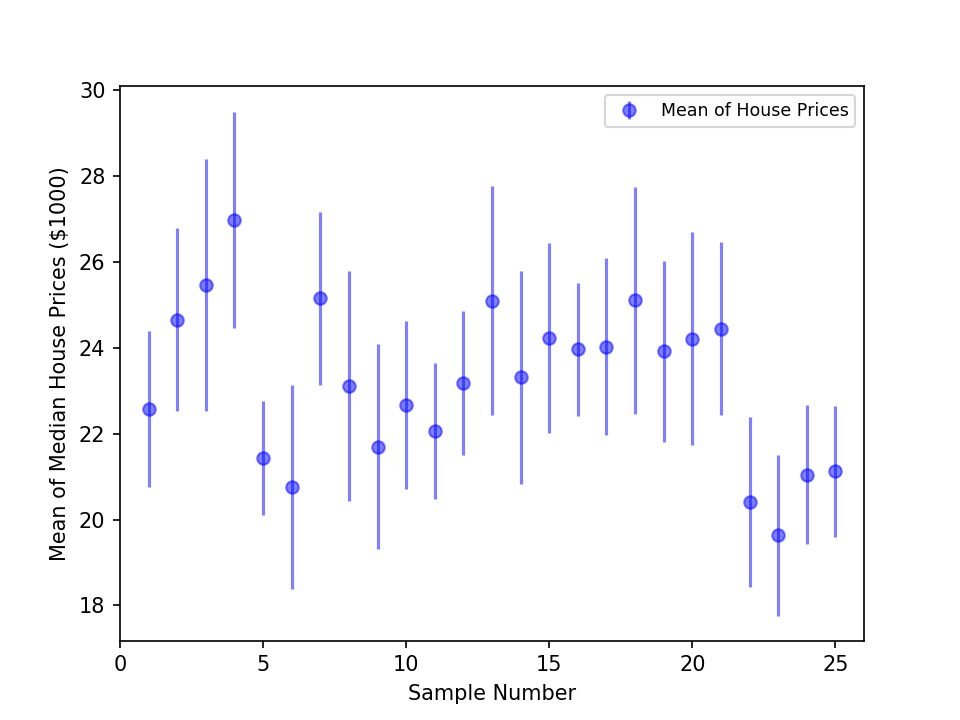

In [7]:
# Plot sample means with error bars
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(samples), 1)+1,means, yerr=sems, fmt="o", 
            color="b", alpha=0.5, label="Mean of House Prices")
ax.set_xlim(0, len(means)+1)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Median House Prices ($1000)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

In [8]:
# Calculate the range of SEM values
print(f"The range of SEM values in the sample set is {max(sems)-min(sems)}")

The range of SEM values in the sample set is 1.6085777155949348


In [9]:
# Determine which sample's mean is closest to the population mean
print(f"The smallest SEM observed was {min(sems)}")
samp_index = sems.index(min(sems))
print(f"The sample with the smallest SEM is sample {samp_index+1}")

The smallest SEM observed was 1.3227781768925424
The sample with the smallest SEM is sample 5


In [10]:
# Compare to the population mean
print(f"The mean of the sample 5 is {samples[samp_index].MEDV.mean()}")
print(f"The mean of the population data set is {housing_data.MEDV.mean()}")

The mean of the sample 5 is 21.43
The mean of the population data set is 22.532806324110677
